## Dataset
#### https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies?select=titles.csv

1. Developing a content-based recommender system using the genres and/or descriptions.
2. Identifying the main content available on the streaming.
3. Network analysis on the cast of the titles.
4. Exploratory data analysis to find interesting insights.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
import plotly.express as py
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
# import plotly.io as pio
# pio.renderers.default = "notebook_connected"

import plotly.io as pio
pio.renderers.default = "svg"

### Title of Movie & Show

#### Netflix

In [4]:
netflix_title = pd.read_csv('Netflix/titles.csv')
netflix_credit = pd.read_csv('Netflix/credits.csv')

In [5]:
netflix_title.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [6]:
netflix_credit.head()

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


In [7]:
netflix_title.shape

(5850, 15)

#### Amazon Prime

In [8]:
prime_titles = pd.read_csv('Prime/titles.csv')
prime_credits = pd.read_csv('Prime/credits.csv')

In [9]:
prime_titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


In [10]:
prime_credits.head()

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


In [11]:
prime_titles.shape

(9871, 15)

In [12]:
prime_credits.shape

(124235, 5)

#### Hotstar

In [15]:
hotstar_titles = pd.read_csv('Hotstar/titles.csv')
hotstar_credits = pd.read_csv('Hotstar/credits.csv')

In [16]:
hotstar_titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1940,G,120,"['animation', 'family', 'music', 'fantasy']",['US'],NaN,tt0032455,7.7,94681.0,57.751,7.4
1,tm67803,Snow White and the Seven Dwarfs,MOVIE,"A beautiful girl, Snow White, takes refuge in ...",1937,G,83,"['fantasy', 'family', 'romance', 'animation', ...",['US'],NaN,tt0029583,7.6,195321.0,107.137,7.1
2,tm82546,Pinocchio,MOVIE,Lonely toymaker Geppetto has his wishes answer...,1940,G,88,"['animation', 'comedy', 'family', 'fantasy']",['US'],NaN,tt0032910,7.5,141937.0,71.160,7.1
3,tm79357,Bambi,MOVIE,Bambi's tale unfolds from season to season as ...,1942,G,70,"['animation', 'drama', 'family']",['US'],NaN,tt0034492,7.3,140406.0,68.136,7.0
4,tm62671,Treasure Island,MOVIE,Enchanted by the idea of locating treasure bur...,1950,PG,96,"['family', 'action']","['GB', 'US']",NaN,tt0043067,6.9,8229.0,10.698,6.5


In [17]:
hotstar_titles.shape

(1535, 15)

In [10]:
title.genres.value_counts()

genres
['comedy']                                                       484
['documentation']                                                329
['drama']                                                        328
['comedy', 'drama']                                              135
['drama', 'romance']                                             124
                                                                ... 
['drama', 'war', 'action', 'thriller', 'history', 'european']      1
['thriller', 'crime', 'drama', 'western']                          1
['drama', 'scifi', 'fantasy', 'horror']                            1
['horror', 'fantasy', 'thriller']                                  1
['documentation', 'music', 'reality']                              1
Name: count, Length: 1726, dtype: int64

In [11]:
title1 = title.assign(genre=title['genres'].str.split(",")).explode('genre')

In [12]:
title1["genre"] = title1["genre"].str.replace("^\['|'\]$","")

In [13]:
title1['genre'] = title1["genre"].str.replace("'","")
# title['country'] = title["country"].str.replace("'","")

In [14]:
title1['genre'] = title1['genre'].str.strip()
# title['country'] = title['country'].str.strip()

In [15]:
title1.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN,[documentation]
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,[drama
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,crime]
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300,[drama
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300,action


In [16]:
title1['genre'].value_counts()

genre
[drama       1093
drama         883
[comedy       821
drama]        664
comedy        597
             ... 
[fantasy]       5
[scifi]         5
[war]           4
[sport          4
[western]       1
Name: count, Length: 73, dtype: int64

In [17]:
title1[title1['genre'] == '[]']
title1.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN,[documentation]
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,[drama
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,crime]
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300,[drama
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300,action


In [18]:
title1.drop(title1[title1['genre'] == '[]'].index, inplace=True)

In [19]:
title1['genre'].value_counts()

genre
[drama       1093
drama         883
[comedy       821
drama]        664
comedy        597
             ... 
[fantasy]       5
[scifi]         5
[war]           4
[sport          4
[western]       1
Name: count, Length: 72, dtype: int64

In [20]:
title.groupby('release_year')['release_year'].count().reset_index(name="count")

,release_year,count
0,1945,1
1,1954,2
2,1956,1
3,1958,1
4,1959,1
...,...,...
58,2018,773
59,2019,836
60,2020,814
61,2021,787


In [21]:
countData = title['release_year'].value_counts().rename_axis("Release Year").reset_index(name="Count")
countData.head(1)

,Release Year,Count
0,2019,836


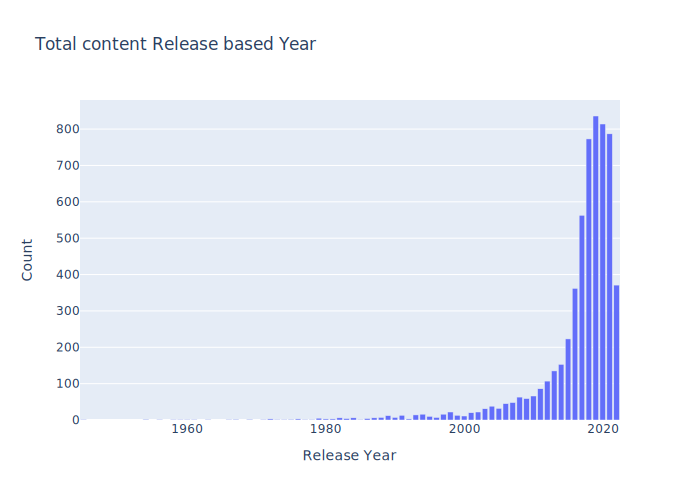

In [22]:
bar = py.bar(countData, x="Release Year", y="Count", title="Total content Release based Year")
bar.show()

### Plot Based on Release Year

In [24]:
release_year = title.groupby(['release_year', 'type'])[['type']].apply(lambda x: len(x)).reset_index()
# countCont
movie = release_year[release_year['type'] == 'MOVIE']
show = release_year[release_year['type'] == 'SHOW']

# Movie
movie['Movie'] = movie[0]
movie = movie.drop([0, 'type'], axis=1)

# Show
show['Show'] = show[0]
show = show.drop([0, 'type'], axis=1)

In [25]:
release_year = pd.merge(movie, show, on='release_year', how='inner')
release_year.head(1)

,release_year,Movie,Show
0,1969,1,1


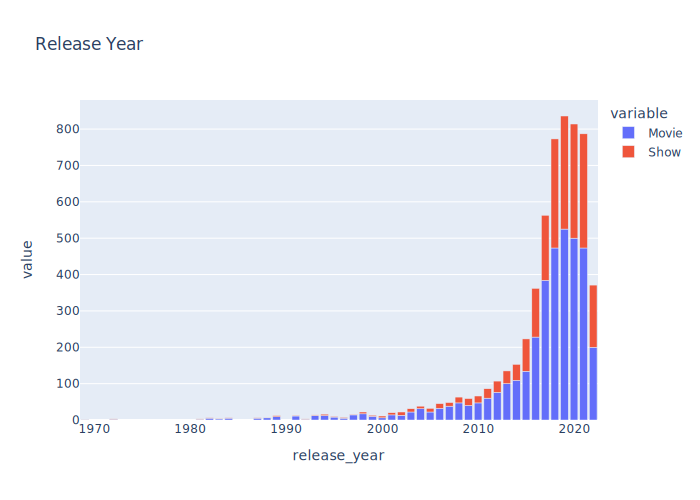

In [26]:
# release_year.iplot(kind="bar", x="release_year", color=["dodgerblue", "mediumseagreen"], title="Release Year")
bar = py.bar(release_year, x="release_year", y=["Movie", "Show"], title="Release Year")
bar.show()

### Plot Based on Gernes Type

In [28]:
genData = title1.groupby(['genre', 'type'])[['type']].apply(lambda x: len(x)).reset_index()
movie=genData[genData['type'] == 'MOVIE']
show=genData[genData['type'] == 'SHOW']

# Movie
movie['movie'] = movie[0]
movie = movie.drop([0, 'type'], axis=1)

# Show
show['show'] = show[0]
show = show.drop([0, 'type'], axis=1)

In [29]:
genData = pd.merge(movie, show, on='genre', how='inner')
genData.head(1)

,genre,movie,show
0,[action,220,131


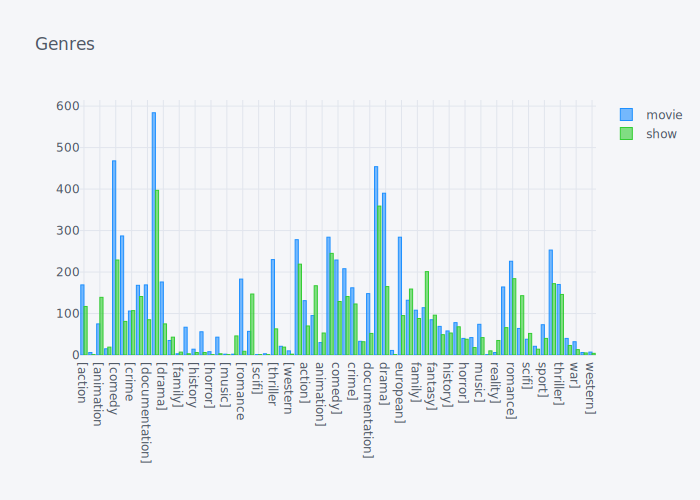

In [99]:
genData.iplot(kind="bar", x="genre", color=["dodgerblue", "limegreen"], title="Genres")

### Plot Based on Gernes Type & IMDB Ratings (People like most)

In [32]:
genData = title1[title1['imdb_score'] > 5].groupby(['genre', 'type'])[['type']].apply(lambda x: len(x)).reset_index()
movie=genData[genData['type'] == 'MOVIE']
show=genData[genData['type'] == 'SHOW']

# Movie
movie['movie'] = movie[0]
movie = movie.drop([0, 'type'], axis=1)

# Show
show['show'] = show[0]
show = show.drop([0, 'type'], axis=1)

genData = pd.merge(movie, show, on='genre', how='inner')
genData.head(1)

,genre,movie,show
0,[action,169,117


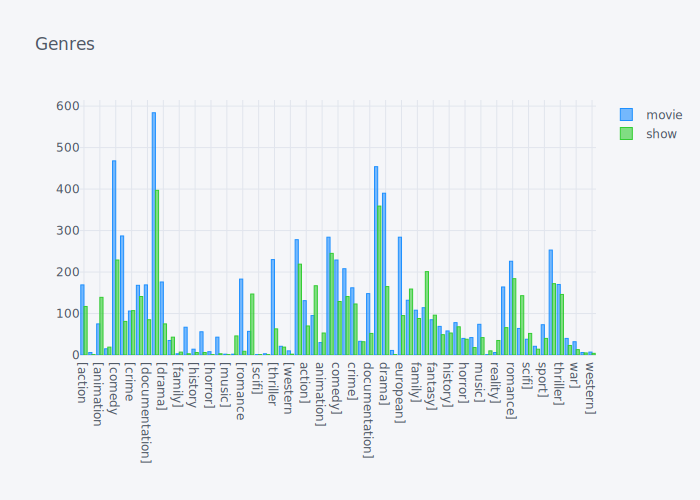

In [33]:
genData.iplot(kind="bar", x="genre", title="Genres", color=["dodgerblue", "limegreen"])

# Credit Dataset

In [35]:
credit = pd.read_csv('credits.csv')
credit.head()

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


In [36]:
credit.shape

(77801, 5)

In [37]:
credit.id.unique().shape

(5489,)

In [38]:
title[title['id'] == 'tm84618']

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179


In [39]:
credit[credit['id'] == 'tm84618'].head()

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


In [40]:
credit = credit.groupby('id')['name'].apply(list).reset_index()
credit.head()

,id,name
0,tm1000037,"[Luna Wedler, Jannis Niewöhner, Milan Peschel,..."
1,tm1000147,"[Guy Pearce, Matilda Anna Ingrid Lutz, Travis ..."
2,tm100015,"[Idris Elba, Paul Walker, Matt Dillon, Michael..."
3,tm1000166,"[Glenn Fredly, Marcello Tahitoe, Andien Aisyah..."
4,tm1000185,"[Adrianna Chlebicka, Mateusz Banasiuk, Mirosła..."


In [41]:
df = pd.merge(title, credit, on='id', how='inner')
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,name
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,"[Robert De Niro, Jodie Foster, Albert Brooks, ..."
1,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300,"[Jon Voight, Burt Reynolds, Ned Beatty, Ronny ..."
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811,"[Graham Chapman, John Cleese, Eric Idle, Terry..."
3,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600,"[Lee Marvin, Ernest Borgnine, Charles Bronson,..."
4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,73424.0,17.617,8.306,"[Graham Chapman, Michael Palin, Terry Jones, E..."


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5489 entries, 0 to 5488
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5489 non-null   object 
 1   title                 5488 non-null   object 
 2   type                  5489 non-null   object 
 3   description           5481 non-null   object 
 4   release_year          5489 non-null   int64  
 5   age_certification     2990 non-null   object 
 6   runtime               5489 non-null   int64  
 7   genres                5489 non-null   object 
 8   production_countries  5489 non-null   object 
 9   seasons               1840 non-null   float64
 10  imdb_id               5120 non-null   object 
 11  imdb_score            5063 non-null   float64
 12  imdb_votes            5049 non-null   float64
 13  tmdb_popularity       5487 non-null   float64
 14  tmdb_score            5317 non-null   float64
 15  name                 

In [43]:
df.shape

(5489, 16)

In [44]:
df['description'].fillna('', inplace=True)
df['genres'].fillna('', inplace=True)

/var/folders/kf/s1dwfp6s6ms9z6dnhhdr4k3c0000gn/T/ipykernel_4520/1529376550.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/kf/s1dwfp6s6ms9z6dnhhdr4k3c0000gn/T/ipykernel_4520/1529376550.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

In [45]:
df["genres"] = df['genres'].str.replace(r"^\['|'\]$", "", regex=True).str.replace(r"', '", ", ")

In [46]:
df["artist"] = df['name'].apply(lambda x: ', '.join(x))

In [47]:
df['combined_features'] = df['description'] + ' ' + df['genres'] + ' ' + df["artist"]
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,name,artist,combined_features
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"drama, crime",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,"[Robert De Niro, Jodie Foster, Albert Brooks, ...","Robert De Niro, Jodie Foster, Albert Brooks, H...",A mentally unstable Vietnam War veteran works ...
1,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"drama, action, thriller, european",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300,"[Jon Voight, Burt Reynolds, Ned Beatty, Ronny ...","Jon Voight, Burt Reynolds, Ned Beatty, Ronny C...",Intent on seeing the Cahulawassee River before...
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"fantasy, action, comedy",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811,"[Graham Chapman, John Cleese, Eric Idle, Terry...","Graham Chapman, John Cleese, Eric Idle, Terry ...","King Arthur, accompanied by his squire, recrui..."
3,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"war, action","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600,"[Lee Marvin, Ernest Borgnine, Charles Bronson,...","Lee Marvin, Ernest Borgnine, Charles Bronson, ...",12 American military prisoners in World War II...
4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"comedy, european",['GB'],4.0,tt0063929,8.8,73424.0,17.617,8.306,"[Graham Chapman, Michael Palin, Terry Jones, E...","Graham Chapman, Michael Palin, Terry Jones, Er...",A British sketch comedy series with the shows ...


In [48]:
# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', tokenizer=None)

# Fit and transform the data
tfidf_matrix = tfidf_vectorizer.fit_transform(df['combined_features'])

# Print the shape of the matrix
tfidf_matrix.shape

(5489, 59078)

In [49]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim.shape

(5489, 5489)

In [50]:
# Function to get movie recommendations based on the title
def get_recommendations(title, cosine_sim=cosine_sim, data=df):
    # Get the index of the movie that matches the title
    if title not in data['title'].values:
        print(f"Title '{title}' not found in the dataset.")
        return []
    
    idx = data[data['title'] == title].index[0]
    
    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the scores of the 20 most similar movies
    sim_scores = sim_scores[1:21]
    
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    
    # Return the top 10 most similar movies
    return data['title'].iloc[movie_indices]

In [51]:
movie_title = 'Taxi Driver'
recommended_movies = get_recommendations(movie_title)
# print("Movies recommended for '{}':\n".format(movie_title), recommended_movies)
recommended_movies

3781                        The Irishman: In Conversation
4700                                  Pretend It's a City
347                          No Direction Home: Bob Dylan
35                                             GoodFellas
2911                                         The Irishman
5324          Stories of a Generation - with Pope Francis
1674             Rumble: The Indians Who Rocked the World
1314                                          Taxi Driver
237                                          The Departed
3229                        Garth Brooks: The Road I'm On
2174                        They'll Love Me When I'm Dead
3145    Rolling Thunder Revue: A Bob Dylan Story by Ma...
1860                           The Other Side of the Wind
291                                    The Girl Next Door
53                                           Endless Love
46                                             Awakenings
451                                          Sir! No Sir!
48            